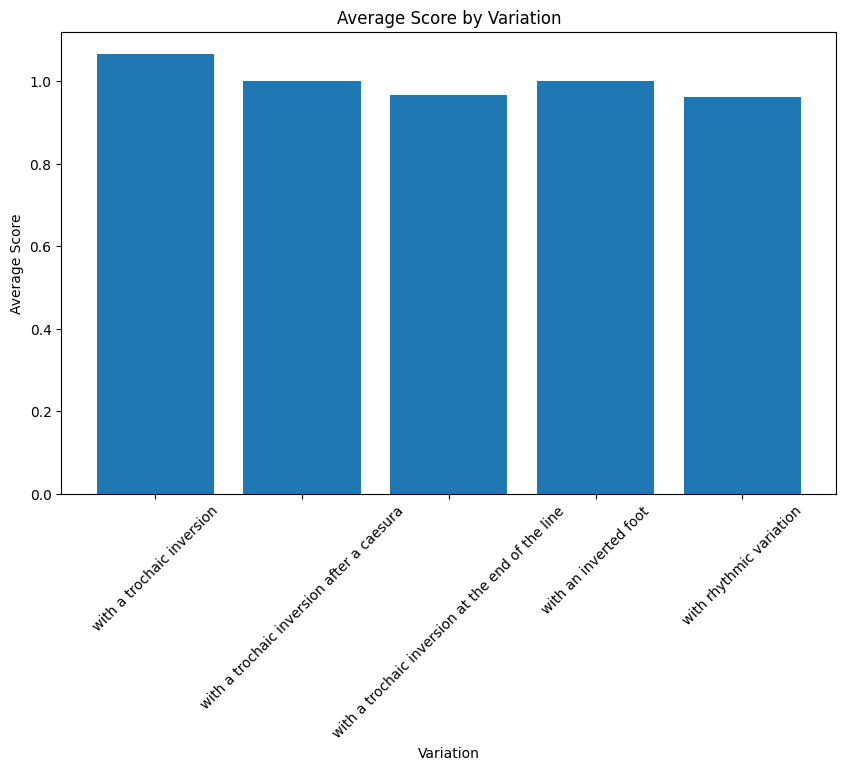

In [2]:
import matplotlib.pyplot as plt
# Group by 'variation' and calculate the mean of 'score'
df_mean_score = df.groupby('variation')['score'].mean().reset_index()
# Plotting the average score by variation
plt.figure(figsize=(10, 6))
plt.bar(df_mean_score['variation'], df_mean_score['score'])
plt.xlabel('Variation')
plt.ylabel('Average Score')
plt.title('Average Score by Variation')
plt.xticks(rotation=45)
plt.show()
# Assign the result back to df
df = df_mean_score

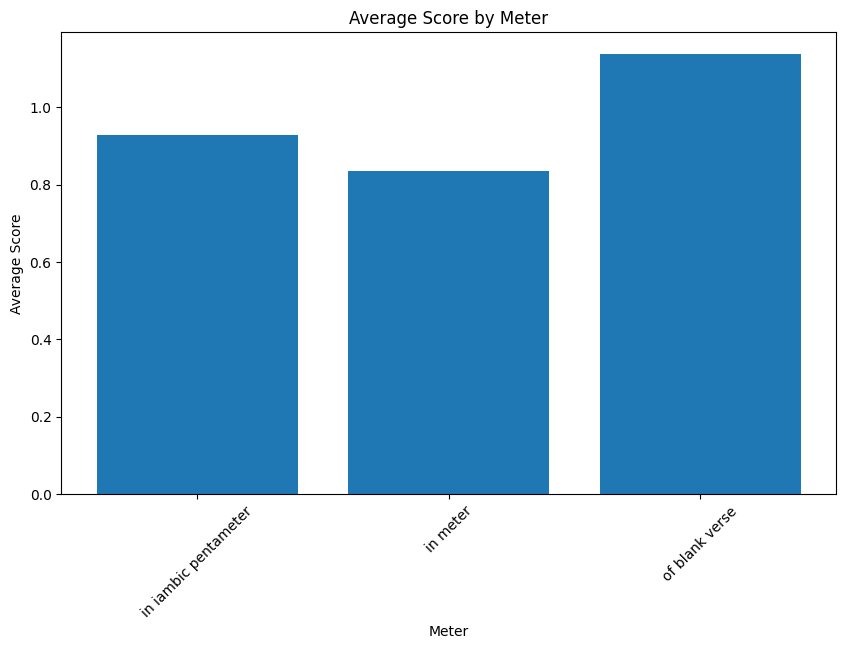

In [5]:
import matplotlib.pyplot as plt
# Group by 'meter_x' and calculate the mean of 'score'
df_mean_score = df_clean.groupby('meter_x')['score'].mean().reset_index()
# Plotting the average score by meter_x
plt.figure(figsize=(10, 6))
plt.bar(df_mean_score['meter_x'], df_mean_score['score'])
plt.xlabel('Meter')
plt.ylabel('Average Score')
plt.title('Average Score by Meter')
plt.xticks(rotation=45)
plt.show()
# Assign the result back to df
df = df_mean_score

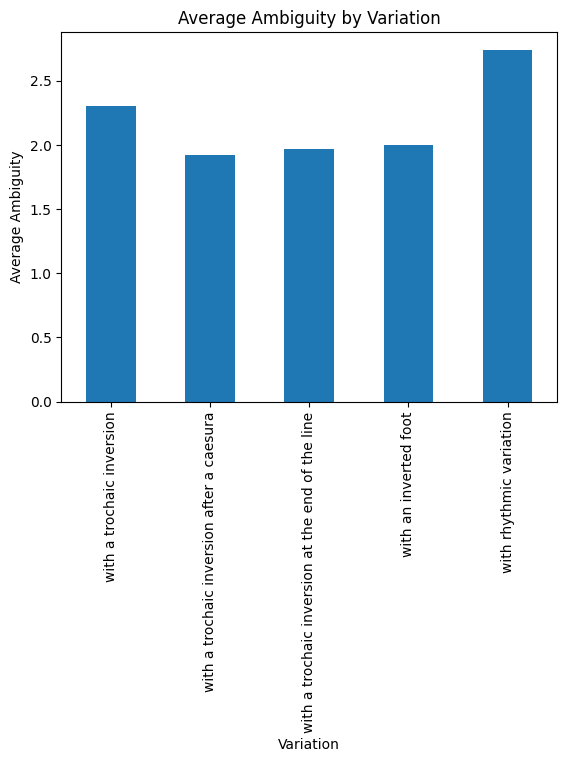

In [9]:
import matplotlib.pyplot as plt
# Graph ambiguity by variation
df_clean.groupby('variation')['ambig'].mean().plot(kind='bar')
plt.xlabel('Variation')
plt.ylabel('Average Ambiguity')
plt.title('Average Ambiguity by Variation')
plt.show()

In [ ]:
## clean up df
# Replace - with W and + with S in meter and stress

import pandas as pd

o1df = pd.read_csv('/Users/bsg25/metricalgpt/corpora_and_scansions/o1_mini results/IPanimals.csv')
o1df['meter'] = o1df['meter_y'].str.replace('-', 'W').str.replace('+', 'S')
o1df['stress'] = o1df['stress'].str.replace('-', 'W').str.replace('+', 'S')
o1df = o1df.dropna(subset=['txt'])

In [ ]:
# Delete rows where 'txt' has no value


In [21]:
def calculate_percentage(df, substring):
    total_stress_values = len(df['stress'])
    substring_count = df['stress'].str.contains(substring).sum()
    percentage = (substring_count / total_stress_values) * 100
    return percentage

# Example usage
substring = 'WWW'
percentage = calculate_percentage(o1df, substring)
print(f"Percentage of 'stress' values that contain '{substring}': {percentage:.2f}%")

Percentage of 'stress' values that contain 'WWW': 4.67%


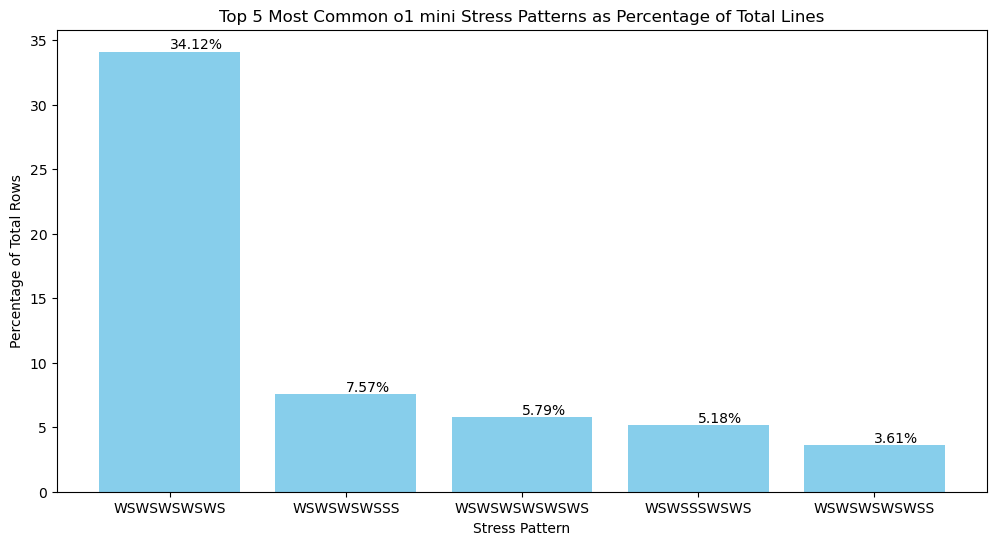

In [18]:
# Calculate the frequency of each stress pattern
stress_counts = o1df['stress'].value_counts().head(5)
# Calculate the percentage of each stress pattern
stress_percentage = (stress_counts / len(o1df)) * 100
# Plotting the graph
plt.figure(figsize=(12, 6))
bars = plt.bar(stress_percentage.index, stress_percentage.values, color='skyblue')
plt.xlabel('Stress Pattern')
plt.ylabel('Percentage of Total Rows')
plt.title('Top 5 Most Common o1 mini Stress Patterns as Percentage of Total Lines')
# Label each bar with the percentage value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', va='bottom')

plt.show()

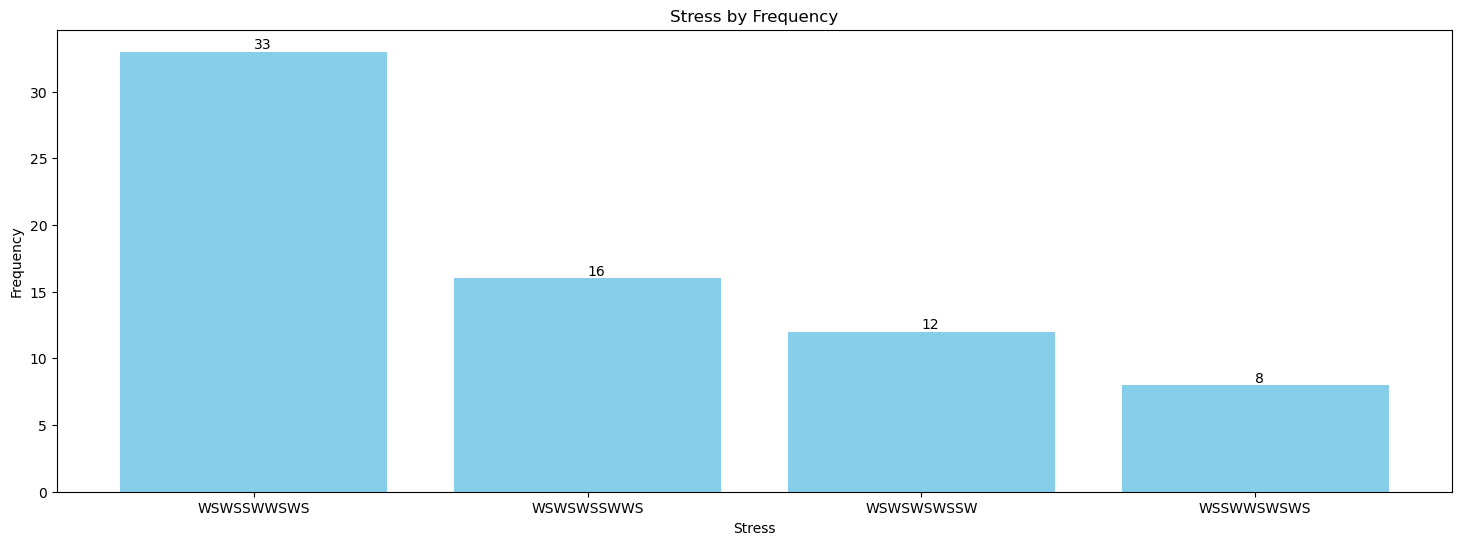

In [11]:
stress_patterns = ['SWWSWSWSWS', 'WSSWWSWSWS', 'WSWSSWWSWS', 'WSWSWSSWWS', 'WSWSWSWSSW', 'SWWSSWWSWS', 'WSSWWSSWWS', 'SWSWWSWSWS', 'WSSWSWWSWS', 'SWWSWWWSWS']
trocheedf = o1df[o1df['stress'].isin(stress_patterns)]


import matplotlib.pyplot as plt
# Group by 'stress' and count frequencies
stress_frequency = trocheedf['stress'].value_counts().reset_index()
stress_frequency.columns = ['stress', 'frequency']
# Plotting the graph with logarithmic scale
plt.figure(figsize=(18, 6))
bars = plt.bar(stress_frequency['stress'], stress_frequency['frequency'], color='skyblue')
plt.yscale('linear')
plt.xlabel('Stress')
plt.ylabel('Frequency')
plt.title('Stress by Frequency')
# Label each bar with total count
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom') 

plt.show()